In [81]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy as np
print('numpy: {}'.format(np.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
import matplotlib.pyplot as plt
# pandas
import pandas as pd
print('pandas: {}'.format(pd.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
import pickle as pickle

Python: 3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 18:10:19) 
[GCC 7.2.0]
scipy: 1.0.0
numpy: 1.14.0
matplotlib: 2.1.2
pandas: 0.22.0
sklearn: 0.19.1


In [82]:
def pickle_data(filename, data):

    fileObject = open('PickleData/'+filename,'wb') 
    # this writes the object a to the
    # file named 'testfile'
    pickle.dump(data,fileObject) 

    # here we close the fileObject
    fileObject.close()
    
def load_pickle_data(filename):
    # we open the file for reading
    fileObject = open('PickleData/'+filename,'rb')  
    # load the object from the file into var b
    return pickle.load(fileObject)

In [83]:
#Load validation set predictions from logistic regr model on binary dataset
pred_y = load_pickle_data('pred_y_logistic_binary')

In [4]:
#Load validation Dataset
df_val = pd.read_csv('Data/validation.csv')

In [84]:
#Load training Dataset
df_train = pd.read_csv('Data/train.csv')

In [85]:
#Load training Dataset
df_test = pd.read_csv('Data/test.csv')

#### Using Formula bid = base_bid x pCTR/avgCTR

In [86]:
base_bid = sum(df_train['payprice'])/df_train.shape[0]
avg_ctr = df_train[df_train['click']==1].shape[0]/df_train.shape[0]*100
p_ctr = pred_y
 

In [87]:
bid = base_bid * p_ctr/avg_ctr

In [88]:
base_bid

78.15141623895867

In [17]:
# df_val['predbid'] = bid
# df_val['predclick'] = (p_ctr > 0.6) * 1
df_test['predbid'] = bid
df_test['predclick'] = (p_ctr > 0.6) * 1

In [ ]:
df_val.sort(['predbid'], ascending=[1, 0])

In [56]:
budget = 6250000

budget_list = []

def calculate_budget(data):
    
    # Running budget
    budget_spent = 0
    
    index = 0

    for index, row in data.iterrows():

    #         Budget exceeded
        if (budget_spent >= budget):
            break

    #       Update budget
        budget_spent = budget_spent + row['payprice']

        
    print('Budget Spent:',budget_spent)
    budget_list.append(budget_spent)
    return index


In [7]:
def calculate_winning_bids(data):
    
    success_bid = data.loc[data['predclick']  & (data['predbid'] > data['payprice'])]
    success_bid = success_bid.reset_index(drop=True)
    
    return success_bid



In [38]:
successfull_bids = calculate_winning_bids(df_val)


### Optimising Base Bid Value

In [53]:
print('Impression with clicks won:',click_const_bid)

Impression with clicks won: 165


In [58]:
base_bid = 0
k=0
base_bid_list = []
clicks_won_list = []

for i in range(10):
    
    print(i)
    base_bid = base_bid + (5)
    base_bid_list.append(base_bid)
    avg_ctr = df_train[df_train['click']==1].shape[0]/df_train.shape[0]*100
    p_ctr = pred_y
    
    bid = base_bid * p_ctr/avg_ctr
    
    df_val['predbid'] = bid
    df_val['predclick'] = (p_ctr > 0.5) * 1

    successfull_bids = calculate_winning_bids(df_val)
    
    click_const_bid = sum(successfull_bids.iloc[0:calculate_budget(successfull_bids),:]['click'])
    clicks_won_list.append(click_const_bid)
    print('Base Bid:',base_bid)
    print('Impression with clicks won:',click_const_bid)
    print('------------------')

0
Budget Spent: 802351
Base Bid: 5
Impression with clicks won: 46
------------------
1
Budget Spent: 2806462
Base Bid: 10
Impression with clicks won: 118
------------------
2
Budget Spent: 4034267
Base Bid: 15
Impression with clicks won: 143
------------------
3
Budget Spent: 5031841
Base Bid: 20
Impression with clicks won: 158
------------------
4
Budget Spent: 5804783
Base Bid: 25
Impression with clicks won: 174
------------------
5
Budget Spent: 6221621
Base Bid: 30
Impression with clicks won: 179
------------------
6
Budget Spent: 6250037
Base Bid: 35
Impression with clicks won: 173
------------------
7
Budget Spent: 6250071
Base Bid: 40
Impression with clicks won: 171
------------------
8
Budget Spent: 6250002
Base Bid: 45
Impression with clicks won: 170
------------------
9
Budget Spent: 6250002
Base Bid: 50
Impression with clicks won: 170
------------------


In [59]:
base_bid_list

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

In [60]:
clicks_won_list

[46, 118, 143, 158, 174, 179, 173, 171, 170, 170]

In [61]:
budget_list

[802351,
 2806462,
 4034267,
 5031841,
 5804783,
 6221621,
 6250037,
 6250071,
 6250002,
 6250002]

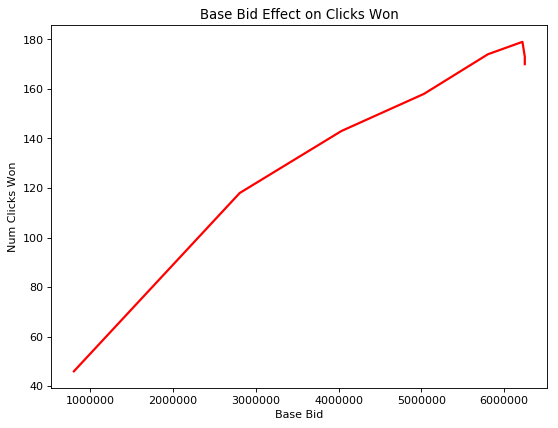

In [80]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(budget_list, clicks_won_list, 'r',linewidth=2)
plt.xlabel('Base Bid')
plt.ylabel('Num Clicks Won')

plt.title('Base Bid Effect on Clicks Won')
plt.show()